In [73]:
import os #Importing the os Module for Saves and Retries of files

import warnings # Warnings to handle Warning Messages
import pandas as pd # Imports raw data as a workable DataFrame 
warnings.filterwarnings('ignore')

# Reading the csv file and understanding the data

In [74]:
data = pd.read_csv(os.getcwd() + '/usecase-2.csv') # Reading the Data

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null float64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null float64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null float64
month        45211 non-null object
duration     45211 non-null float64
campaign     45211 non-null float64
pdays        45211 non-null float64
previous     45211 non-null float64
poutcome     45211 non-null object
output       45211 non-null object
dtypes: float64(7), object(10)
memory usage: 5.9+ MB


# Data Exploratory Analysis 

In [76]:
import seaborn as sns # For Intercative Plotting
%matplotlib inline 
import matplotlib.pyplot as plt # for visualising and plotting

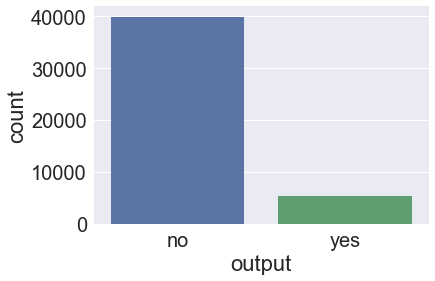

In [77]:
sns.countplot("output",data=data)

# The Output Variable signifies it is Samplying problem

In [78]:
##### There are couple of samplying techniques 
## UP SAMPLYING ####
## DOWN SAMPLYING ####
## SMOT ####

# Data Preprocessing on Categorical and Numerical data

In [81]:
#we have different categorical data which needs to converted into numerical by One Hot Encoder or get_dummies function
#Encoding the Categorical variables by using get_dummies function(removing categorical columns)
###### list of caterogical variables ###############################
## job / marital / education / default / housing / loan / contact /month / day_of_week /poutcome 
data = data.join(pd.get_dummies(data[['job','marital','education','default','housing','loan','contact',
                                      'month','poutcome']], sparse = True)) 
data = data.drop(['job','marital','education','default','housing','loan',
                  #'contact','month','poutcome'], axis=1) # dropping the encoded features(duplicate)

SyntaxError: unexpected EOF while parsing (<ipython-input-81-0d9af2d14ea8>, line 8)

In [82]:
data.info() # Printing the data after converting into Dummy Variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 61 columns):
age                    45211 non-null float64
job                    45211 non-null object
marital                45211 non-null object
education              45211 non-null object
default                45211 non-null object
balance                45211 non-null float64
housing                45211 non-null object
loan                   45211 non-null object
contact                45211 non-null object
day                    45211 non-null float64
month                  45211 non-null object
duration               45211 non-null float64
campaign               45211 non-null float64
pdays                  45211 non-null float64
previous               45211 non-null float64
poutcome               45211 non-null object
output                 45211 non-null object
job_admin.             45211 non-null uint8
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 no

# Correlation matrix to find the best predictor from the dataset

In [83]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.055717,-0.044002,0.021792,...,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418,-0.004927,-0.022967,0.035526,-0.000816
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.026726,-0.048757,0.009642,...,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922,0.011857,0.008466,0.035240,-0.030271
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.010455,-0.022898,-0.002312,...,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890,-0.068700,-0.032952,-0.030321,0.086256
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,-0.015722,0.009637,-0.001327,...,-0.021426,-0.005519,0.007089,-0.006041,0.015076,0.015077,-0.018925,-0.001958,0.042389,-0.003491
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.021868,0.008986,0.002128,...,0.043893,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718,-0.088131,-0.020107,-0.057486,0.107965
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.027497,0.020063,-0.014203,...,-0.113476,0.032002,0.079029,0.007892,0.056814,0.084427,0.701052,0.389791,0.228539,-0.869962
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.014245,-0.017095,-0.008181,...,-0.060765,0.027273,0.001341,0.037868,0.053934,0.064990,0.350627,0.306615,0.201424,-0.532763
job_admin.,-0.055717,-0.026726,-0.010455,-0.015722,-0.021868,0.027497,0.014245,1.000000,-0.188216,-0.066273,...,-0.004495,0.013225,0.026657,-0.007874,0.011293,0.007279,0.018431,0.010745,0.012056,-0.025940
job_blue-collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,-0.188216,1.000000,-0.096585,...,0.021727,-0.041441,0.165448,-0.048027,-0.042410,-0.044816,0.002254,0.001342,-0.053074,0.022194
job_entrepreneur,0.021792,0.009642,-0.002312,-0.001327,0.002128,-0.014203,-0.008181,-0.066273,-0.096585,1.000000,...,0.015497,-0.016615,-0.009908,0.051017,-0.012012,-0.007769,0.001119,-0.013506,-0.019111,0.014901


In [84]:
# Number of predictors are more ,using Excel sheet to find the best correlated variable 
## using function to sort the data and checking the correlation

In [20]:
def corrank(X):
    import itertools
    data = pd.DataFrame([[i,j,X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],
                      columns=['pair-1','pair-2','corr'])    
    #print(df.sort_values(by='corr',ascending=False))
    return data

dfCorr = corrank(data)  ## checking the correlation in excel sheet
writer = pd.ExcelWriter('output5.xlsx') ## writing to data into excel to check the correlation
dfCorr.to_excel(writer,'Sheet1') ## writing the excel file
writer.save() ## saving the file 

# Features identified from Excel using Correlation 

In [85]:
######## Best Features identified after correlation matrix using EDA ########
## Bi-variate and Multi-variate Analysis #######
#############    Feature Identied ********************
#poutcome_success,housing_no,contact_cellular,month_mar,month_oct,month_sep,
#housing_yes,contact_unknown,poutcome_unknown

In [86]:
# Feature idenfied from the correlation techniques
data_correlated = data[['poutcome_success','housing_no','contact_cellular','month_mar','month_oct','month_sep',
                  'housing_yes','contact_unknown','poutcome_unknown','output]]

In [90]:
data_correlated .info()# significent variables used for modelling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
poutcome_success    45211 non-null uint8
housing_no          45211 non-null uint8
contact_cellular    45211 non-null uint8
month_mar           45211 non-null uint8
month_oct           45211 non-null uint8
month_sep           45211 non-null uint8
housing_yes         45211 non-null uint8
contact_unknown     45211 non-null uint8
poutcome_unknown    45211 non-null uint8
output              45211 non-null object
dtypes: object(1), uint8(9)
memory usage: 750.7+ KB


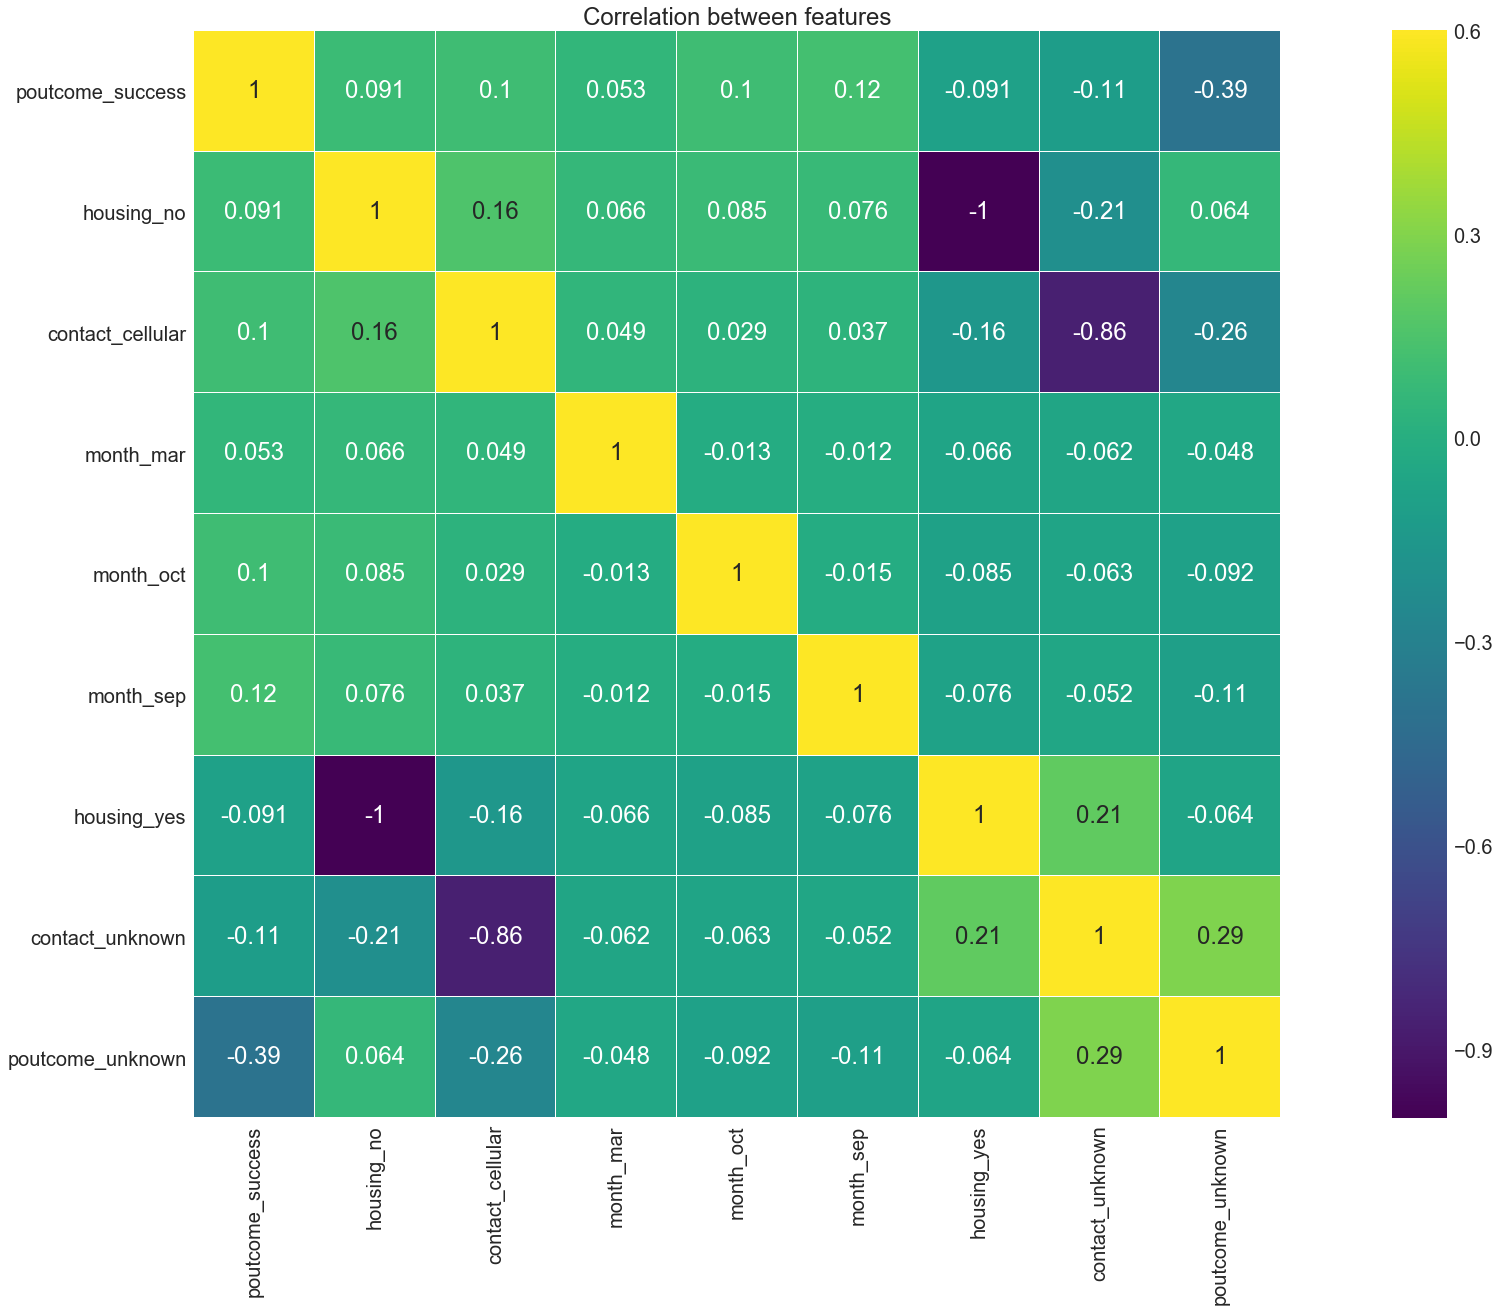

In [91]:
corrmat = data_correlated.corr()
sns.set(font_scale=2.0)
plt.figure(figsize=(40, 20))

sns.heatmap(corrmat, vmax=.6, linewidths=0.01,
            square=True, annot=True, cmap='viridis', linecolor="white")

plt.title('Correlation between features');
plt.show() 

In [92]:
# using correlation matrix contact_unknown feature need to be removed as it is highly correlated
#### removing contact_unknown predictor ####
data_correlated = data_correlated.drop(['contact_unknown'],axis =1)

In [94]:
data_correlated.info() # dataframe after dropping the least significent variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
poutcome_success    45211 non-null uint8
housing_no          45211 non-null uint8
contact_cellular    45211 non-null uint8
month_mar           45211 non-null uint8
month_oct           45211 non-null uint8
month_sep           45211 non-null uint8
housing_yes         45211 non-null uint8
poutcome_unknown    45211 non-null uint8
output              45211 non-null object
dtypes: object(1), uint8(8)
memory usage: 706.5+ KB


# Data Imbalance problem **Sampling the Imbalanced Data**

In [95]:
from sklearn.utils import resample # importing the essetial library for sampling
from imblearn.over_sampling import SMOTE # importing sub samplying library

# Classifying the data frame in Majority and Minority class for Samplying

In [102]:
df_majority = data_correlated[data_correlated.output == 'no'] # Classifying the data into Majority class seperately
df_majority
# classifying dataframe into X and y variables
X_maj = df_majority.iloc[:,:-1]
y_maj = df_majority.iloc[:,-1]

In [103]:
df_minority = data_correlated[data_correlated.output == 'yes'] # Classifying the data into Minority class seperately
df_minority
# classifying dataframe into X and y variables
X_min = df_minority.iloc[:,:-1]
y_min = df_minority.iloc[:,-1]

# Splitting the Majority into Train and Test class

In [106]:
# Splitting the dataset into training data and test data for majority class
from sklearn.cross_validation import train_test_split # importing essential library
X_train_maj,X_test_maj,y_train_maj,y_test_maj = train_test_split(X_maj,y_maj, test_size = 0.3, random_state =0)

In [126]:
X_train_maj.count()

poutcome_success    27945
housing_no          27945
contact_cellular    27945
month_mar           27945
month_oct           27945
month_sep           27945
housing_yes         27945
poutcome_unknown    27945
dtype: int64

# Splitting the Minority into Train and Test class

In [107]:
# Splitting the dataset into training data and test data for majority class
from sklearn.cross_validation import train_test_split # importing essential library
X_train_min,X_test_min,y_train_min,y_test_min = train_test_split(X_min,y_min, test_size = 0.3, random_state =0)

In [147]:
X_test_min.count() # counting the number of records

poutcome_success    1587
housing_no          1587
contact_cellular    1587
month_mar           1587
month_oct           1587
month_sep           1587
housing_yes         1587
poutcome_unknown    1587
dtype: int64

# Applying Samplying technique on Majority Class on training data

In [131]:
#######Downsample majority class##########
df_majority_downsampled_X = resample(X_train_maj, 
                                 replace=False,    # sample without replacement
                                 n_samples=3702,   # to match minority class training data
                                 random_state=123) # reproducible results

#######Downsample majority class##########
df_majority_downsampled_y = resample(y_train_maj, 
                                 replace=False,    # sample without replacement
                                 n_samples=3702,   # to match minority class training data
                                 random_state=123) # reproducible results

In [138]:
df_majority_downsampled_X.info() # data after donwsampled
pd.DataFrame(df_majority_downsampled_X) #converting into dataframes
pd.DataFrame(X_train_min) #converting into dataframes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3702 entries, 34751 to 6811
Data columns (total 8 columns):
poutcome_success    3702 non-null uint8
housing_no          3702 non-null uint8
contact_cellular    3702 non-null uint8
month_mar           3702 non-null uint8
month_oct           3702 non-null uint8
month_sep           3702 non-null uint8
housing_yes         3702 non-null uint8
poutcome_unknown    3702 non-null uint8
dtypes: uint8(8)
memory usage: 57.8 KB


,poutcome_success,housing_no,contact_cellular,month_mar,month_oct,month_sep,housing_yes,poutcome_unknown
15108,0,0,0,0,0,0,1,1
44173,1,1,0,0,0,0,0,0
43862,1,1,1,0,0,0,0,0
29633,0,1,1,0,0,0,0,1
31839,0,0,1,0,0,0,1,0
38921,0,0,1,0,0,0,1,1
34681,0,0,1,0,0,0,1,0
41904,0,1,1,0,1,0,0,1
44867,0,0,1,0,0,1,1,1
42318,0,1,1,0,0,0,0,1


# Concatenating Downsampled Majority class data with Minority training data 

In [153]:
# concatenation of training data
Training_data_X = pd.concat([df_majority_downsampled_X,X_train_min]) # concat of X
Training_data_y = pd.concat([df_majority_downsampled_y,y_train_min]) #concat of y

In [154]:
Training_data_X

,poutcome_success,housing_no,contact_cellular,month_mar,month_oct,month_sep,housing_yes,poutcome_unknown
7473,0,1,0,0,0,0,0,1
9522,0,1,0,0,0,0,0,1
43209,0,1,1,1,0,0,0,1
35654,0,1,1,0,0,0,0,0
6226,0,0,0,0,0,0,1,1
30393,0,1,1,0,0,0,0,1
22619,0,1,1,0,0,0,0,1
22966,0,1,1,0,0,0,0,1
12203,0,1,0,0,0,0,0,1
20417,0,1,1,0,0,0,0,1


In [155]:
Training_data_y

7473      no
9522      no
43209     no
35654     no
6226      no
30393     no
22619     no
22966     no
12203     no
20417     no
5345      no
12220     no
23777     no
8690      no
9367      no
18039     no
33179     no
31052     no
163       no
37189     no
2270      no
29302     no
18408     no
33449     no
35835     no
25767     no
8410      no
22787     no
9573      no
30302     no
        ... 
11622    yes
40873    yes
15479    yes
17903    yes
17087    yes
33110    yes
3681     yes
37093    yes
31849    yes
33518    yes
44307    yes
44749    yes
33937    yes
39990    yes
13892    yes
31222    yes
40012    yes
34075    yes
33882    yes
38237    yes
16291    yes
41572    yes
43425    yes
21296    yes
44320    yes
44448    yes
41052    yes
31123    yes
38300    yes
39439    yes
Name: output, Length: 5289, dtype: object

# Applying Samplying technique on Majority Class on test data

In [156]:
#######Downsample majority class##########
df_majority_downsampled_X = resample(X_test_maj, 
                                 replace=False,    # sample without replacement
                                 n_samples=1587,   # to match minority class training data
                                 random_state=123) # reproducible results

#######Downsample majority class##########
df_majority_downsampled_y = resample(y_test_maj, 
                                 replace=False,    # sample without replacement
                                 n_samples=1587,   # to match minority class training data
                                 random_state=123) # reproducible results

In [150]:
df_majority_downsampled_X.info() # data after donwsampled
pd.DataFrame(df_majority_downsampled_X) #converting into dataframes
pd.DataFrame(X_train_min) #converting into dataframes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 7473 to 27249
Data columns (total 8 columns):
poutcome_success    1587 non-null uint8
housing_no          1587 non-null uint8
contact_cellular    1587 non-null uint8
month_mar           1587 non-null uint8
month_oct           1587 non-null uint8
month_sep           1587 non-null uint8
housing_yes         1587 non-null uint8
poutcome_unknown    1587 non-null uint8
dtypes: uint8(8)
memory usage: 24.8 KB


,poutcome_success,housing_no,contact_cellular,month_mar,month_oct,month_sep,housing_yes,poutcome_unknown
15108,0,0,0,0,0,0,1,1
44173,1,1,0,0,0,0,0,0
43862,1,1,1,0,0,0,0,0
29633,0,1,1,0,0,0,0,1
31839,0,0,1,0,0,0,1,0
38921,0,0,1,0,0,0,1,1
34681,0,0,1,0,0,0,1,0
41904,0,1,1,0,1,0,0,1
44867,0,0,1,0,0,1,1,1
42318,0,1,1,0,0,0,0,1


In [157]:
# concatenation of training data
Test_data_X = pd.concat([df_majority_downsampled_X,X_train_min]) # concat of X
Test_data_y = pd.concat([df_majority_downsampled_y,y_train_min]) #concat of y

In [152]:
Test_data_X

,poutcome_success,housing_no,contact_cellular,month_mar,month_oct,month_sep,housing_yes,poutcome_unknown
7473,0,1,0,0,0,0,0,1
9522,0,1,0,0,0,0,0,1
43209,0,1,1,1,0,0,0,1
35654,0,1,1,0,0,0,0,0
6226,0,0,0,0,0,0,1,1
30393,0,1,1,0,0,0,0,1
22619,0,1,1,0,0,0,0,1
22966,0,1,1,0,0,0,0,1
12203,0,1,0,0,0,0,0,1
20417,0,1,1,0,0,0,0,1


In [158]:
Test_data_y

7473      no
9522      no
43209     no
35654     no
6226      no
30393     no
22619     no
22966     no
12203     no
20417     no
5345      no
12220     no
23777     no
8690      no
9367      no
18039     no
33179     no
31052     no
163       no
37189     no
2270      no
29302     no
18408     no
33449     no
35835     no
25767     no
8410      no
22787     no
9573      no
30302     no
        ... 
11622    yes
40873    yes
15479    yes
17903    yes
17087    yes
33110    yes
3681     yes
37093    yes
31849    yes
33518    yes
44307    yes
44749    yes
33937    yes
39990    yes
13892    yes
31222    yes
40012    yes
34075    yes
33882    yes
38237    yes
16291    yes
41572    yes
43425    yes
21296    yes
44320    yes
44448    yes
41052    yes
31123    yes
38300    yes
39439    yes
Name: output, Length: 5289, dtype: object

# From Sampled Data Taking one slice of data and Applying Model

In [162]:
# we have to take different sample of data from Sampled data and apply Classifier on it

# Applying Model on the dataset on Training and Test data

# Classification Problem Applying  SVM and Naive Bayes

In [160]:
#Applying kernal svm model fitting model
from sklearn.svm import SVC # essential library
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(Training_data_X,Training_data_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

# Prediction of Test data

In [169]:
## predicitng the outcome 
y_pred =classifier.predict(Test_data_X)

# Evaluation Matrix for performance of model on test data
# Applying Confusion Matrix

In [175]:
#applying confusion matrix
from sklearn.metrics import confusion_matrix # essential library
cm= confusion_matrix(y_pred,Test_data_y) # object creation and fitting to data

In [176]:
cm # score fo the matrix 
##### PRECISION and RECALL

array([[ 395,  295],
       [1192, 3407]], dtype=int64)

# Applying Naive Bayes Model

In [177]:
#Appying another model naive bayes
from sklearn.naive_bayes import GaussianNB
classifier_nv = GaussianNB()
classifier_nv.fit(Training_data_X,Training_data_y)

GaussianNB(priors=None)

# Prediction of Test data

In [178]:
#predicting the naive bayes 
y_pred_nv =  classifier_nv.predict(Test_data_X)

# Evaluation Matrix for performance of model on test data
# Applying Confusion Matrix

In [179]:
#applying confusion matrix
from sklearn.metrics import confusion_matrix # essential library
cm= confusion_matrix(y_pred,Test_data_y) # object creation and fitting to data

In [180]:
cm # score fo the matrix 
##### PRECISION and RECALL

array([[ 395,  295],
       [1192, 3407]], dtype=int64)

# BOTH THE ALGORITHM IS GIVING GOOD PRERDICTION 

# END ##############